<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#e8efff;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Panic Attack Detection</h1></center>
<center><h3 style="padding-bottom: 25px; color:#0b0265; font-weight: bold; font-style:italic; font-family: Cursive">
(EDA / ML)</h3></center>     

</div>

# about Dataset

<p>💡This dataset is designed to help analyze panic attacks by exploring potential triggers, symptoms, and associated lifestyle factors. It includes details such as age, gender, panic attack frequency, duration, heart rate, sweating, chest pain, trembling, medical history, medication use, caffeine intake, exercise frequency, sleep patterns, alcohol consumption, smoking habits, therapy participation, and panic severity scores..</p>

# Import Libraries and Read Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"training_data.csv")
test_df = pd.read_csv(r'testing_data.csv')
df.head()

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


### **Data features description (17 features):**

1. Participant ID: An exclusive identifier assigned to each participant

2. Age: The participant's age at the time

3. Gender: The participant's gender

4. Family History: About the presence of Panic Disorder or other mental health conditions in the participant's family

5. Personal History: Information of the participant's past experiences relevant to mental health.

6. Current Stressors: Present stressors in the participant's life that may impact mental health

7. Symptoms: Reported symptoms by the participant

8. Severity: The extent of severity regarding the reported symptoms

9. Impact on Life: Evaluation of how the symptoms affect the participant's daily functioning, encompassing work, relationships, and other domains.

10. Demographics: Participant's demographic characteristics

11. Medical History: Participant's general medical background

12. Psychiatric History: Participant's history of psychiatric conditions

13. Substance Use: Participant's usage of substances

14. Coping Mechanisms: Strategies employed by the participant to manage stress or Panic Disorder symptoms

15. Social Support: Quantity and quality of available social support including friends, family, or other support groups

16. Lifestyle Factors: Factors associated with the participant's lifestyle that may influence mental health such as sleep habits, dietary patterns, and physical activity

17. Panic Disorder Diagnosis: The diagnosis of panic disorder which indicates whether the participant has panic disorder or not


<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1. Review Dataset</h3></center>
</div>

In [3]:
test_df.shape

(20000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [5]:
df.drop(columns={'Participant ID'}, inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,41.45430,13.839204,18.0,29.0,41.0,53.0,65.0
Panic Disorder Diagnosis,100000.0,0.04285,0.202520,0.0,0.0,0.0,0.0,1.0


In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
Gender,100000,2,Male,50052
Family History,100000,2,Yes,50042
Personal History,100000,2,No,50210
Current Stressors,100000,3,Low,33409
Symptoms,100000,5,Fear of losing control,20236
Severity,100000,3,Severe,33510
Impact on Life,100000,3,Mild,33452
Demographics,100000,2,Rural,50087
Medical History,74827,3,Diabetes,25074
Psychiatric History,75079,3,Bipolar disorder,25058


<div style="padding: 10px; font-family: Cursive; border: solid 2px #0b0265;
            font-size:15.5px;padding: 25px 10px; border-radius:8px;">
<p>here is the summry of dataset.</p>

<p style="padding-left:30px; font-style:italic; color:#0b0265">The dataset consists of 100,000 entries with a total of 17 features. Among these, there are three numerical features, including "Participant ID," "Age," and "Panic Disorder Diagnosis," while the remaining features are categorical, such as "Gender," "Family History," and "Medical History." Most of the features are complete; however, some have missing values. Notably, "Medical History" has around 25.17% missing data, "Psychiatric History" has 24.92%, and "Substance Use" has 33.37% missing entries. it should be cosider that most of categorical features have three or two classes and maximum number of classes in a feature is 5</p>
</div>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. Data Preprocessing</h3></center>
</div>

In [8]:
df.isna().sum()

Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             25173
Psychiatric History         24921
Substance Use               33374
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64

In [9]:
dup = df[df.duplicated()].shape
print(f"there are {dup[0]} duplicate row")

there are 35 duplicate row


In [10]:
df.drop_duplicates(inplace=True)
print(f"new shape of dataset : {df.shape}")

new shape of dataset : (99965, 16)


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Manage Missing Values</h3>
</div>

In [11]:
df["Medical History"].value_counts()

Medical History
Diabetes         25066
Heart disease    24988
Asthma           24749
Name: count, dtype: int64

In [12]:
# a patient could have not prior disease
df["Medical History"] = df["Medical History"].fillna('None')

In [13]:
df["Psychiatric History"] = df["Psychiatric History"].fillna("None")

In [14]:
df["Substance Use"] = df["Substance Use"].fillna("None")

In [15]:
# Fill na in test dataframe
test_df.fillna("None", inplace=True)

In [16]:
df.isna().sum()

Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Exploratory Data Analysis (EDA)</h3></center>
</div>

In [17]:
# ratio of positive diagnosis 
pos = (df['Panic Disorder Diagnosis'] == 1).sum()
neg = (df['Panic Disorder Diagnosis'] == 0).sum()

all_ex = df['Panic Disorder Diagnosis'].count()

pos_result = round(float((pos / all_ex) * 100), 2)
neg_result = round(float((neg / all_ex) * 100), 2)

print(f'the ration of positive diagnosis is : {pos_result}%')
print(f'the ration of negative diagnosis is : {neg_result}%')

the ration of positive diagnosis is : 4.29%
the ration of negative diagnosis is : 95.71%


In [18]:
select_feat = ['Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors']

def frequency_table(data:pd.DataFrame, ind:str, column:str):
    freq_table = pd.crosstab(index=data[ind], columns=data[column],margins=True)
    rel_table = round(freq_table/freq_table.loc["All"], 2)
    return freq_table, rel_table


for feat in select_feat :    
    freq, rel = frequency_table(df, "Panic Disorder Diagnosis", feat)
    print("Two-way frequency table\n")
    print(freq)
    print("---" * 20)

Two-way frequency table

Gender                    Female   Male    All
Panic Disorder Diagnosis                      
0                          47818  47863  95681
1                           2118   2166   4284
All                        49936  50029  99965
------------------------------------------------------------
Two-way frequency table

Family History               No    Yes    All
Panic Disorder Diagnosis                     
0                         48474  47207  95681
1                          1463   2821   4284
All                       49937  50028  99965
------------------------------------------------------------
Two-way frequency table

Personal History             No    Yes    All
Panic Disorder Diagnosis                     
0                         48803  46878  95681
1                          1387   2897   4284
All                       50190  49775  99965
------------------------------------------------------------
Two-way frequency table

Current Stressors     

## insigt from above cross table.
above tabels show us that evry feature in our dataset what relationship with target feature ("Panic Disorder Diagnosis") have.
1. **Gender**:
   - This feature indicates that there is no difference in the distribution of disorder between males and females.
2. **Family History**:
   - This feature suggests that individuals with a family history of this disorder are more likely to have a higher probability of    developing the disorder themselves..
3. **Personal History**: 
   - Similar to the family history feature, personal history can have a significant impact on the likelihood of a disorder.
4. **Current Stressors**: 
   - This feature is valuable, as the results indicate that high stress can significantly contribute to the likelihood of this         disorder.
5. **Symptoms**:
   - among the five types of symptoms, panic attacks are the most prominent and have the highest prevalence among individuals with     this disorder.
6. **Impact on Life**:
   - We can observe that this disorder significantly impacts the lives of those affected.
7. **Demographics**:
   - Living in a village could increase the likelihood of being affected by this disorder.
8. **Medical History** :
   - The data indicates that most people with panic disorder had a prior medical condition.
9. **Psychiatric History** :
   - Nearly 90 percent of individuals with this disorder have previously experienced a psychiatric problem.
10. **Psychiatric History** :
   - Individuals who chose exercise to overcome this disorder showed significantly better results compared to those who opted for       therapy or meditation.
11. **Psychiatric History** :
   - The data shows that sleep quality is an essential factor in the development of this disorder.

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Data Visualization</h3>
</div>

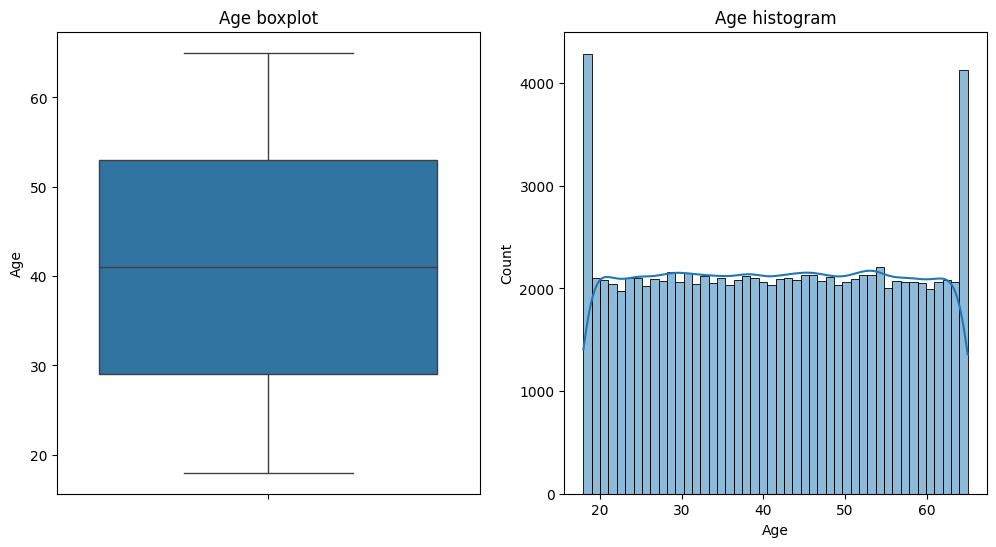

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['Age'])
plt.title("Age boxplot");

plt.subplot(1, 2, 2)
sns.histplot(df["Age"], kde=True);
plt.title("Age histogram");

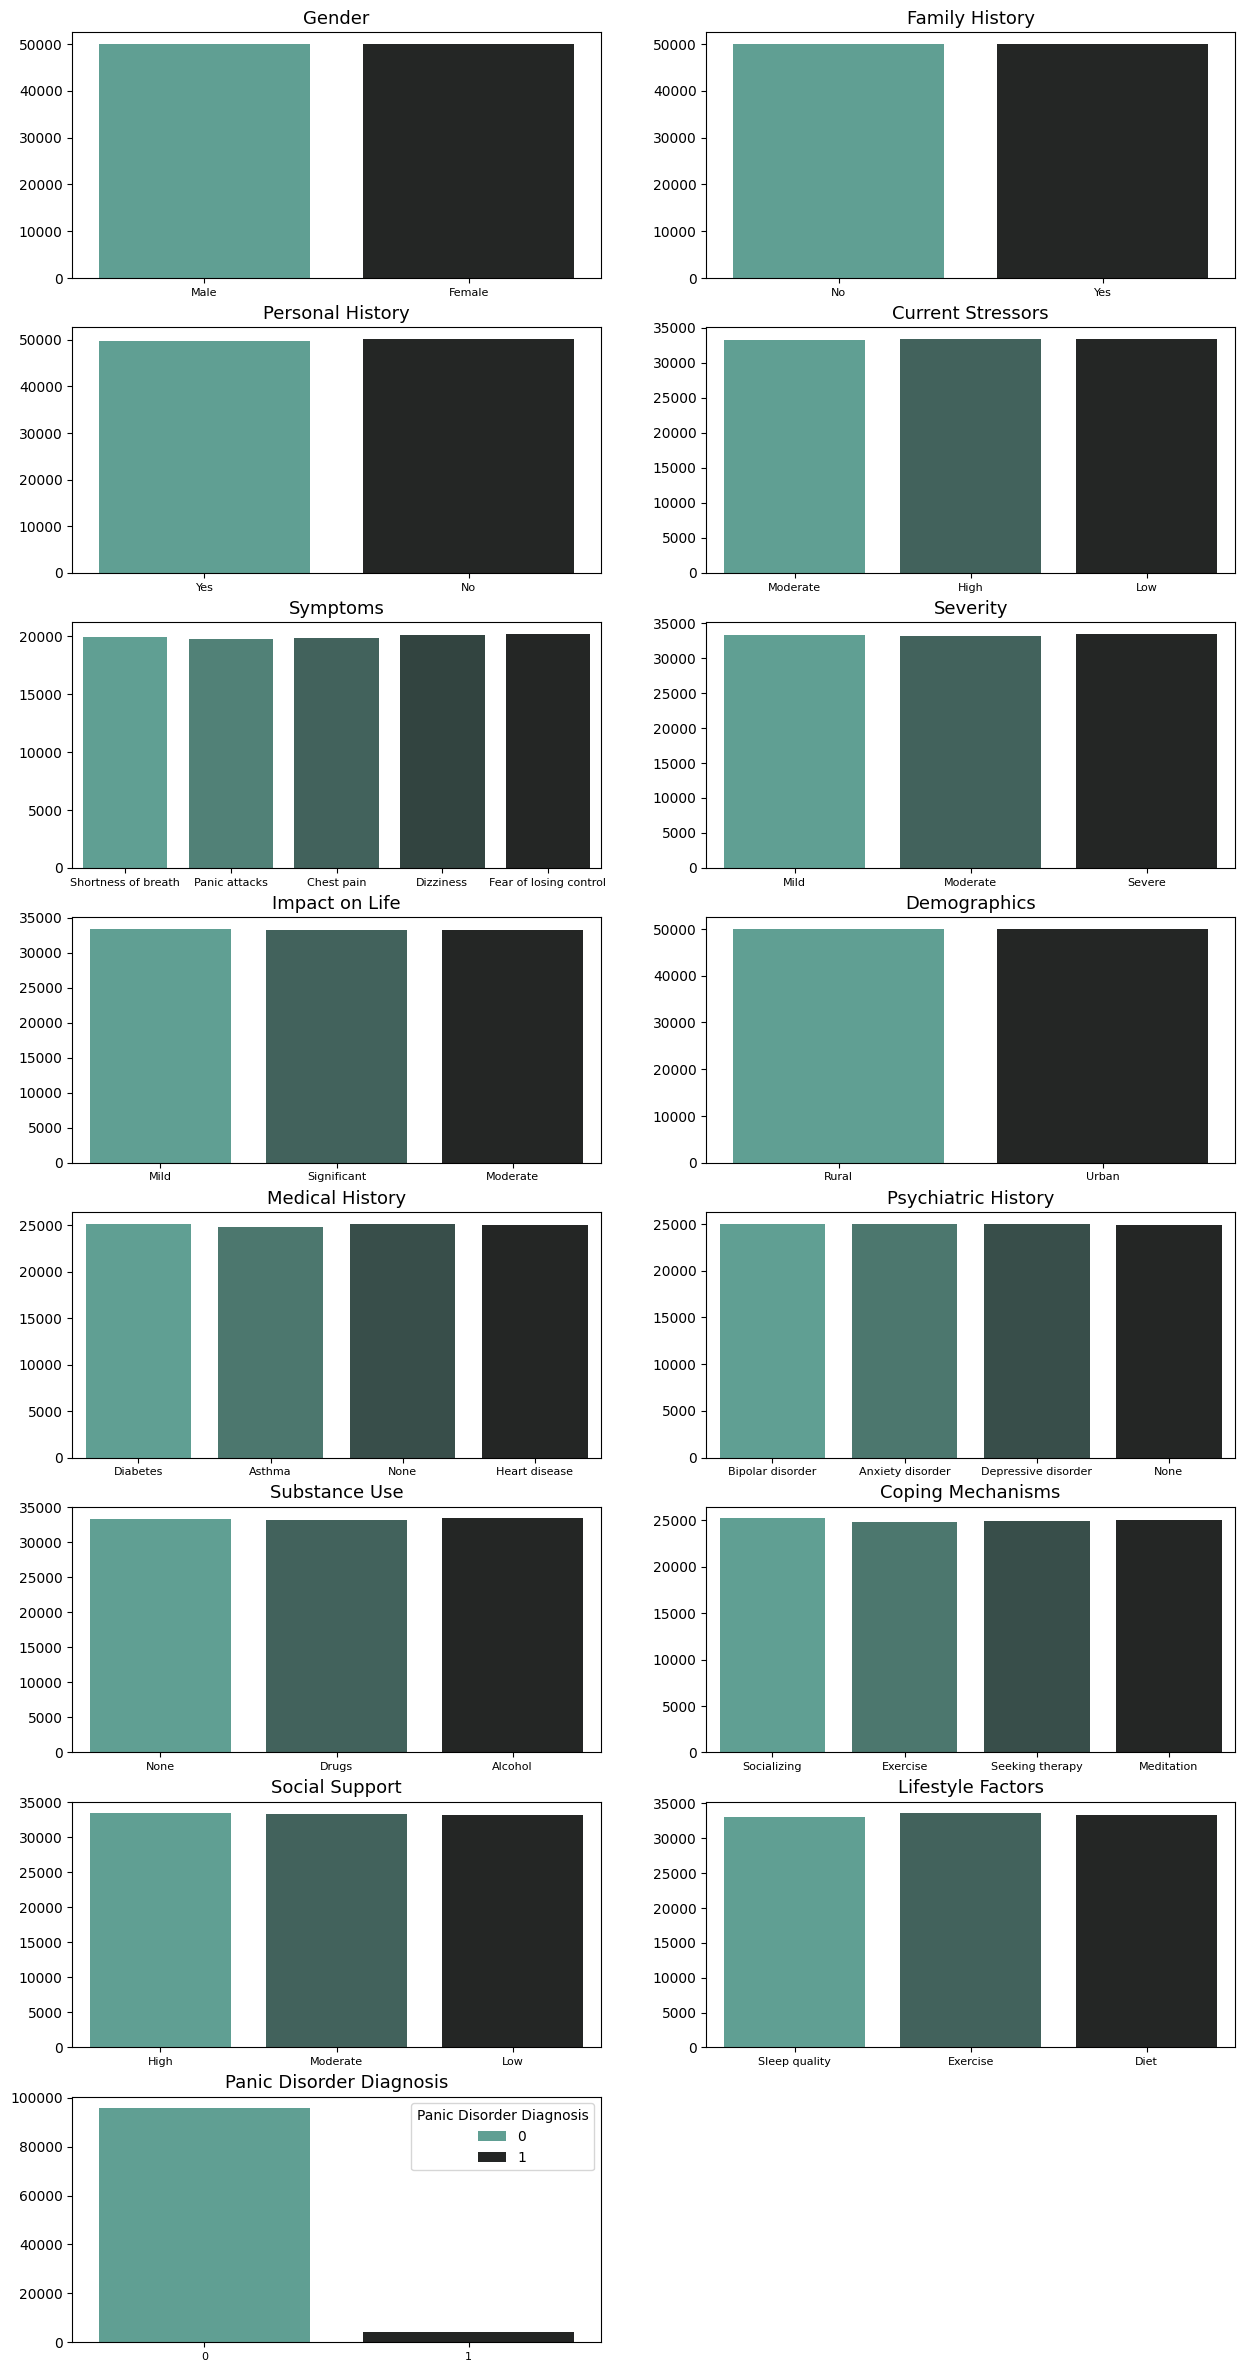

In [20]:
select_feat = ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity', 
               'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use', 
               'Coping Mechanisms', 'Social Support', 'Lifestyle Factors', 'Panic Disorder Diagnosis']
count_df = df[select_feat]

plt.figure(figsize=(15, 30))  
for i, feature in enumerate(count_df.columns) :
    plt.subplot(8, 2, i+1)
    sns.countplot(data=count_df, x=feature, palette='dark:#5A9_r', hue=feature)
    plt.xticks(fontsize=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(feature, fontsize=13)
   
    

<div style="padding: 10px; font-family: Cursive; border: solid 2px #0b0265;
            font-size:15.5px;padding: 25px 10px; border-radius:8px;">
<p style="padding-left:30px; font-style:italic"> these visualization analysis shows that each feature has an equal number of observations per value. and based on that we cannot really tell us much about the data we have.</p>
</div>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
4. Data Preprocessing</h3></center>
</div>

In [21]:
# normalize "Age" feature for train dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[['Age']])
df["Age"]

0       -0.249584
1        0.689840
2       -0.683164
3        1.629264
4       -0.755428
           ...   
99995   -1.405798
99996    1.123420
99997   -1.550325
99998    1.051157
99999   -1.694852
Name: Age, Length: 99965, dtype: float64

In [22]:
# normalize "Age" feature for test dataset
test_scaler = StandardScaler()
test_df["Age"] = test_scaler.fit_transform(test_df[['Age']])
test_df["Age"]

0       -0.035230
1       -1.547389
2       -0.683298
3       -0.035230
4       -0.395268
           ...   
19995   -0.755306
19996   -1.043336
19997   -1.475381
19998   -0.971328
19999   -1.403374
Name: Age, Length: 20000, dtype: float64

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
One hot Encoding</h3>
</div>

In [23]:
train_target = df['Panic Disorder Diagnosis']
test_target = test_df['Panic Disorder Diagnosis']

In [24]:
# train dataset
from sklearn.preprocessing import OneHotEncoder

age_train = df.loc[:, 'Age'].copy().reset_index(drop=True)

train_categoric_features = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded_features = encoder.fit_transform(df[train_categoric_features])
# convert to dataframe
X_train_encoded = pd.DataFrame(X_train_encoded_features, columns=encoder.get_feature_names_out(train_categoric_features))
final_train_dataset = pd.concat([X_train_encoded, age_train], axis=1)

final_train_dataset

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.249584
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.689840
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.683164
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.629264
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.755428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.405798
99961,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.123420
99962,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.550325
99963,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.051157


In [25]:
# test dataset
test_age = test_df.loc[:,"Age"].copy().reset_index(drop=True)

test_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
test_categoric_features = test_df.select_dtypes(include=['object']).columns
X_test_encoded = test_encoder.fit_transform(test_df[test_categoric_features])
X_test_df_encoded = pd.DataFrame(X_test_encoded, columns=test_encoder.get_feature_names_out(test_categoric_features))
final_test_dataset = pd.concat([X_test_df_encoded, test_age], axis=1)
final_test_dataset

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.035230
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.547389
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.683298
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.035230
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.395268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.755306
19996,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.043336
19997,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.475381
19998,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.971328


In [26]:
age = final_train_dataset.loc[:, 'Age']
final_train_dataset = final_train_dataset.astype(dtype='int64')
final_train_dataset.drop('Age', axis = 1)
final_train_dataset['Age'] = age
final_train_dataset

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age
0,0,1,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,-0.249584
1,0,1,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.689840
2,1,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,-0.683164
3,1,0,1,0,1,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,1.629264
4,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,-0.755428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,0,1,0,1,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,-1.405798
99961,1,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1.123420
99962,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,-1.550325
99963,1,0,0,1,0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,1.051157


In [27]:
# Making columns which are one hot encoded to integer and adding "Panic Disorder Diagnosis" column
# Train set

final_train_dataset = final_train_dataset.reset_index(drop=True)
train_target = train_target.reset_index(drop=True)

final_train = pd.concat([final_train_dataset, train_target], axis=1)
final_train.head()

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age,Panic Disorder Diagnosis
0,0,1,1,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,-0.249584,0
1,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0.689840,0
2,1,0,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0,-0.683164,0
3,1,0,1,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,1.629264,0
4,0,1,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,-0.755428,0


In [28]:
# Making columns which are one hot encoded to integer and adding "Panic Disorder Diagnosis" column
# Test set

age = final_test_dataset.loc[:, 'Age']
final_test_dataset = final_test_dataset.astype(dtype='int64')
final_test_dataset.drop('Age', axis = 1)
final_test_dataset['Age'] = age

final_test_dataset = final_test_dataset.reset_index(drop=True)
test_target = test_target.reset_index(drop=True)

final_test = pd.concat([final_test_dataset, test_target], axis=1)
final_test

,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,...,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Age,Panic Disorder Diagnosis
0,0,1,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,-0.035230,0
1,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,-1.547389,0
2,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,-0.683298,0
3,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,-0.035230,0
4,1,0,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,-0.395268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,0,0,1,0,1,1,0,0,1,...,0,0,0,0,1,0,0,1,-0.755306,0
19996,0,1,1,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,-1.043336,0
19997,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,1,0,0,-1.475381,0
19998,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,-0.971328,0


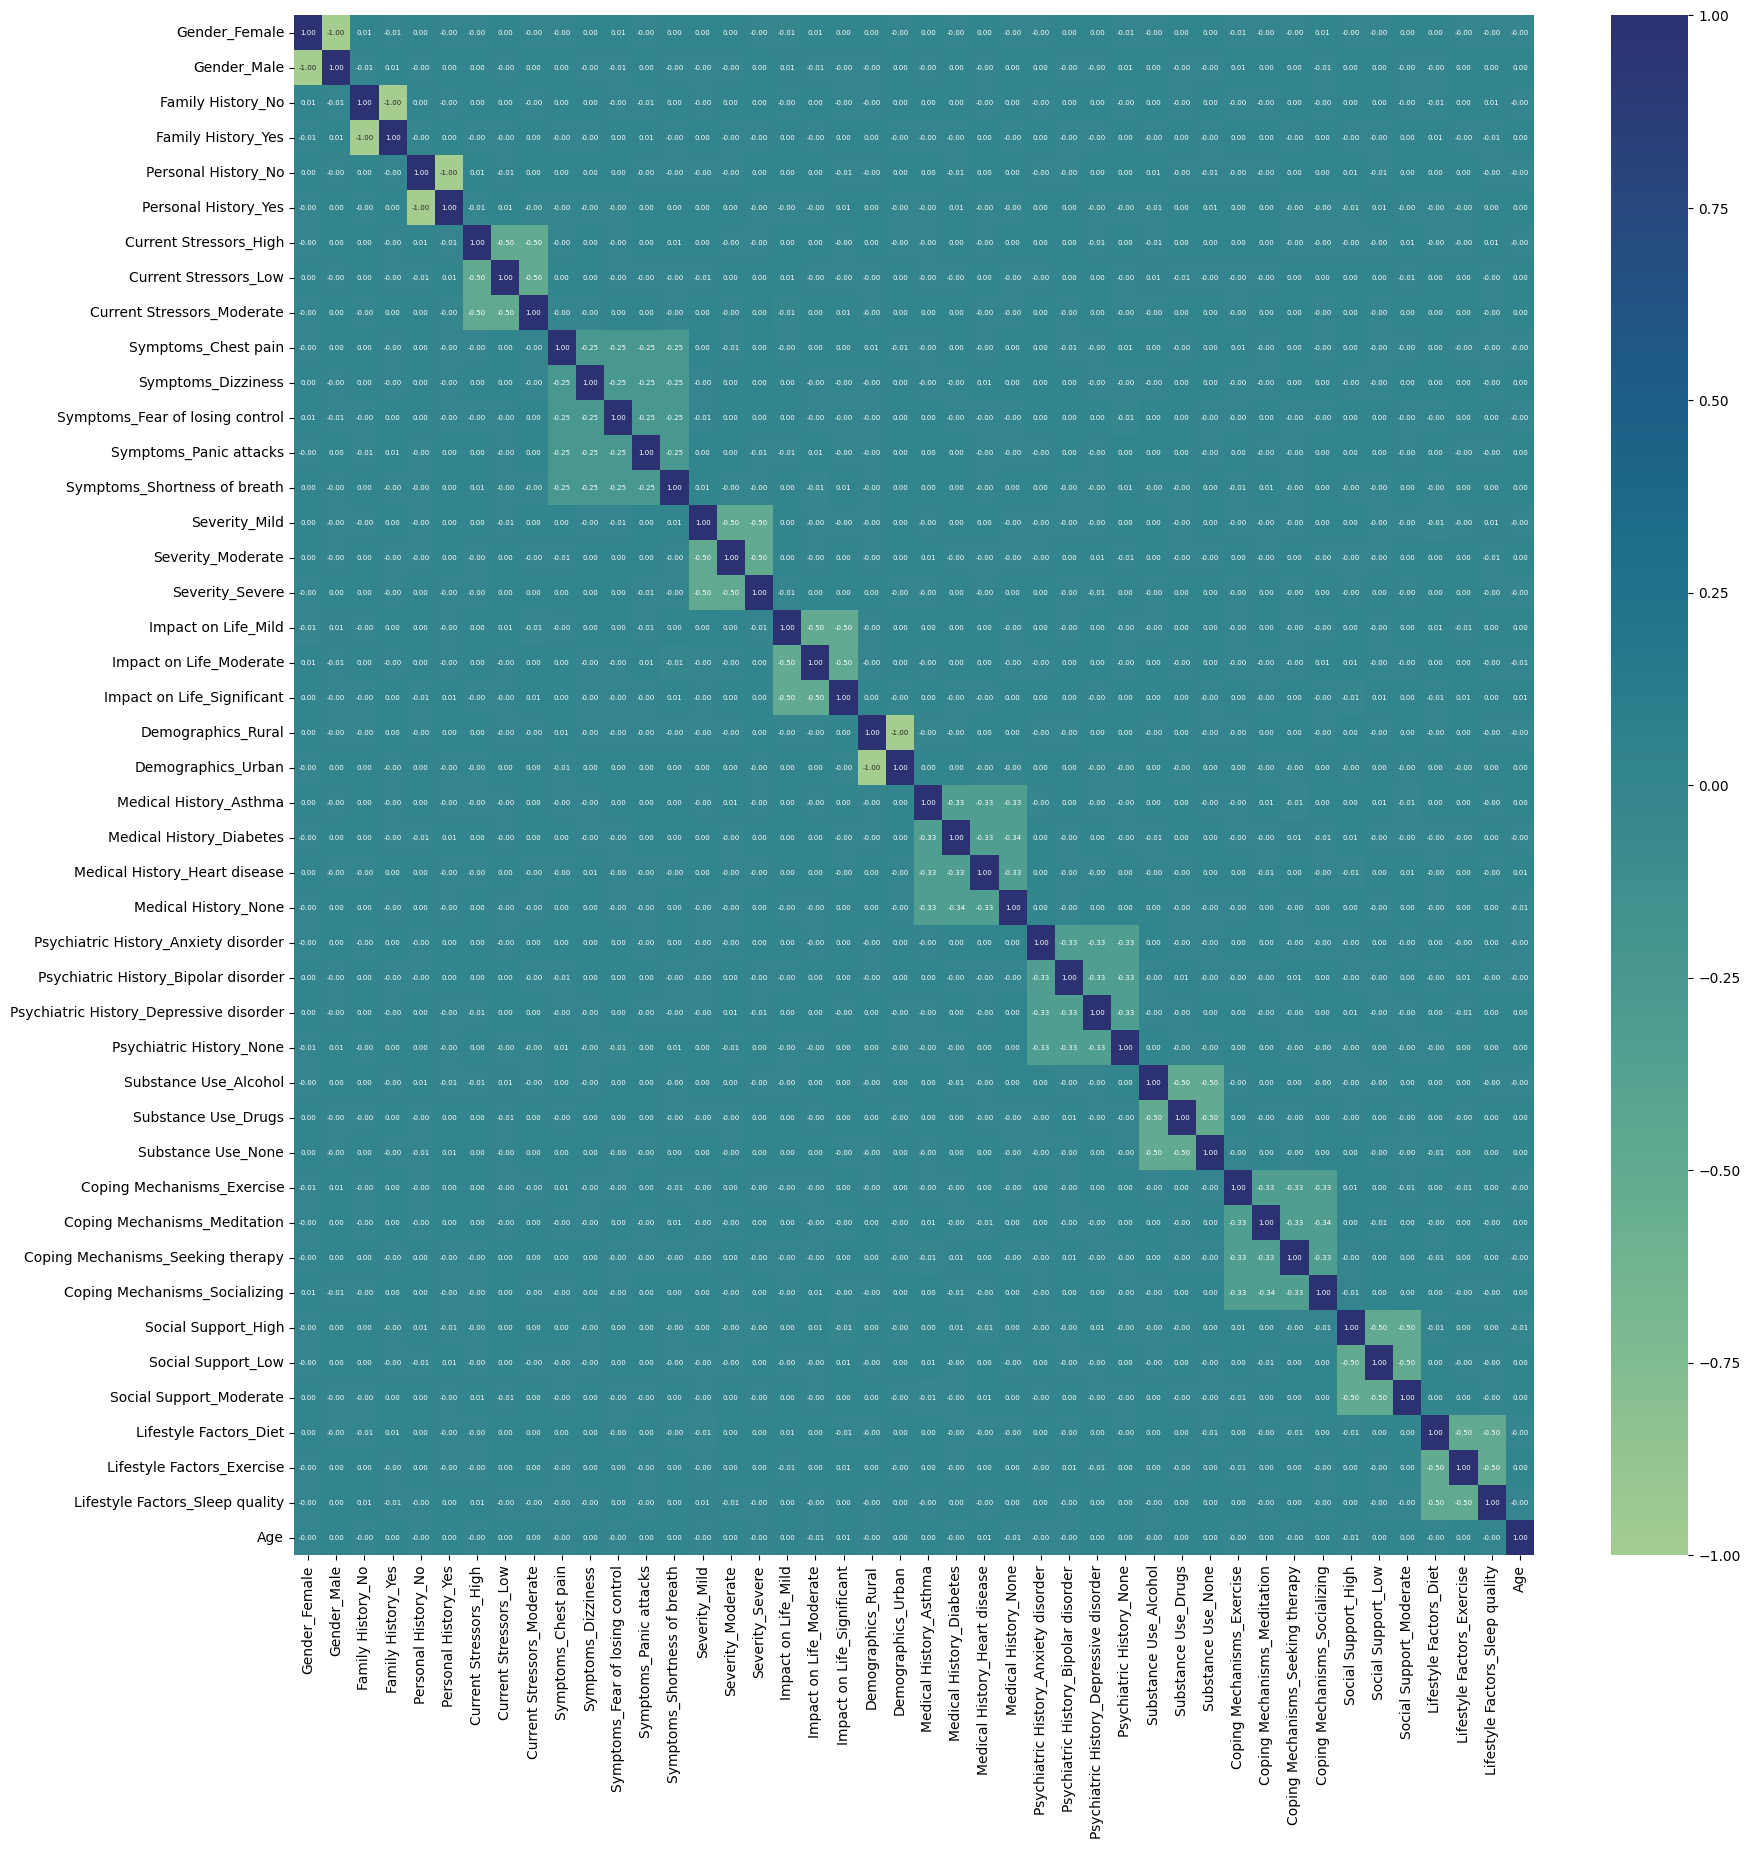

In [29]:
# correlation  matrix

plt.figure(figsize=(20, 20))
sns.heatmap(final_train_dataset.corr(), annot=True, fmt=".2f", cmap="crest", annot_kws={"size": 5})
plt.show()

<div style="padding: 5px 0px; font-family: Cursive; font-size:16px; background-color:#f0f5ff;padding: 25px 10px">
Since the values are all smaller than the general standard, it is hard to find meaningful relationship in the above correlation matrix</div>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
5. Modeling</h3></center>
</div>

In [30]:
# Preparing cross validationg of models
from sklearn.model_selection import train_test_split

X = final_train_dataset
Y = train_target

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.3, random_state=42)

X_test = final_test_dataset
Y_test = test_target

In [31]:
# Checking splitied data sets
print(f"Training Size : {X_train.shape[0]}")
print(f"Validation Size : {X_validation.shape[0]}")
print(f"Test Size : {X_test.shape[0]}")

Training Size : 69975
Validation Size : 29990
Test Size : 20000


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Cross Validating models</h3>
</div>

In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


kfold = StratifiedKFold(n_splits=5)
random_state = 2
results_models = {}


# SVC
my_svc = SVC(random_state=random_state)
result_svc = cross_val_score(estimator=my_svc, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for SVC : {float(result_svc.mean())}")
results_models['SVC'] = float(result_svc.mean())

#DecisionTreeClassifier
my_decisiontree = DecisionTreeClassifier(random_state=random_state)
result_DecisionTree = cross_val_score(estimator=my_decisiontree, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for DecisionTreeClassifier : {float(result_DecisionTree.mean())}")
results_models['DecisionTreeClassifier'] = float(result_DecisionTree.mean())

# AdaBoostClassifier
my_ada = AdaBoostClassifier(random_state=random_state)
result_ada = cross_val_score(estimator=my_ada, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for AdaBoostClassifier : {float(result_ada.mean())}")
results_models['AdaBoost'] = float(result_ada.mean())

# RandomForestClassifier
my_forst = RandomForestClassifier(random_state=random_state) 
result_forest = cross_val_score(estimator=my_forst, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for RandomForest : {float(result_forest.mean())}")
results_models['RandomForest'] = float(result_forest.mean())

# ExtraTreesClassifier
my_extra = ExtraTreesClassifier(random_state=random_state)
result_extra = cross_val_score(estimator=my_extra, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for ExtraTreesClassifier : {float(result_extra.mean())}")
results_models['ExtraTreesClassifier'] = float(result_extra.mean())

# GradientBoostingClassifier
my_gradient = GradientBoostingClassifier(random_state=random_state)
result_gradient = cross_val_score(estimator=my_gradient, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for GradientBoosting : {float(result_gradient.mean())}")
results_models['GradientBoosting'] = float(result_gradient.mean())

# MLPClassifier
my_mlp = MLPClassifier(random_state=random_state)
result_mlp = cross_val_score(estimator=my_mlp, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for MLPClassifier : {float(result_mlp.mean())}")
results_models['MLPClassifier'] = float(result_mlp.mean())

# KNeighborsClassifier
my_kn = KNeighborsClassifier()
result_kn = cross_val_score(estimator=my_kn, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for KNeighborsClassifier : {float(result_kn.mean())}")
results_models['KNeighborsClassifier'] = float(result_kn.mean())

# LogisticRegression
my_logestic = LogisticRegression(random_state=random_state)
result_logestic=cross_val_score(estimator=my_logestic, X=final_train_dataset, y=train_target, scoring='accuracy', cv=kfold, n_jobs=4)
print(f"acuuracy for logestic regression : {float(result_logestic.mean())}")
results_models['LogisticRegression'] = float(result_logestic.mean())

acuuracy for SVC : 1.0
acuuracy for DecisionTreeClassifier : 0.9994898214375031
acuuracy for AdaBoostClassifier : 0.9655579452808484
acuuracy for RandomForest : 0.9995198319411795
acuuracy for ExtraTreesClassifier : 0.9997599159705898
acuuracy for GradientBoosting : 0.9998999649877458
acuuracy for MLPClassifier : 1.0
acuuracy for KNeighborsClassifier : 0.9765918071324965
acuuracy for logestic regression : 0.9684089431300954


In [33]:
models_df = pd.DataFrame(list(results_models.items()), columns=['Classifier', 'Accuracy'])
models_df

,Classifier,Accuracy
0,SVC,1.000000
1,DecisionTreeClassifier,0.999490
2,AdaBoost,0.965558
3,RandomForest,0.999520
4,ExtraTreesClassifier,0.999760
5,GradientBoosting,0.999900
6,MLPClassifier,1.000000
7,KNeighborsClassifier,0.976592
8,LogisticRegression,0.968409


In [34]:
models_df.sort_values(by=['Accuracy'], ascending=False, inplace=True)

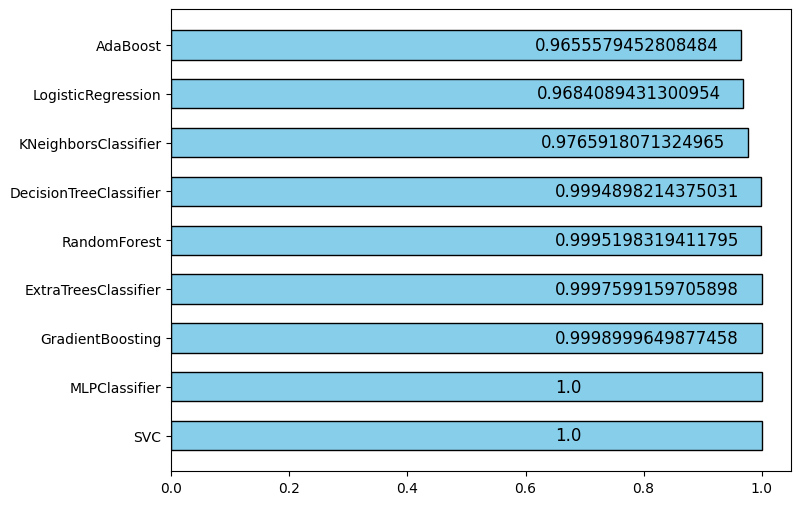

In [35]:
plt.figure(figsize=(8, 6))
plt.barh(y=models_df["Classifier"], width=models_df["Accuracy"], height=0.6, edgecolor='black', color='skyblue');

y_positions = np.arange(models_df.shape[0])
values_list = models_df['Accuracy'].to_list()

for i, value in enumerate(values_list):
    plt.text(value - 0.35, y_positions[i], str(value), va="center", fontsize=12);


<div style="padding: 10px; font-family: Cursive; border: solid 2px #0b0265;
            font-size:15.5px;padding: 25px 10px; border-radius:8px;">
<p>The top 5 models based on the accuracy graph above were trained by the train set and evaluated by the validation set:</p>  
<ul>
  <li>Support Vector Classifier (SVC)</li>
  <li>Multiple Layer Perceptron</li>
  <li>GradientBoosting</li>  
  <li>ExtraTrees</li>
  <li>AdaBoost</li>
</ul> 
</div>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Training Top 5 models</h3>
</div>

In [36]:
models_df

,Classifier,Accuracy
0,SVC,1.000000
6,MLPClassifier,1.000000
5,GradientBoosting,0.999900
4,ExtraTreesClassifier,0.999760
3,RandomForest,0.999520
1,DecisionTreeClassifier,0.999490
7,KNeighborsClassifier,0.976592
8,LogisticRegression,0.968409
2,AdaBoost,0.965558


In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [38]:
svc_model = SVC()
svc_model.fit(X_train, Y_train)
svc_pred = svc_model.predict(X_validation)
svc_acc = accuracy_score(Y_validation, svc_pred)
svc_recall = recall_score(Y_validation, svc_pred)
svc_perc = precision_score(Y_validation, svc_pred)
svc_fscore = f1_score(Y_validation, svc_pred)

print("Precision:", svc_perc)
print("Recall:", svc_recall )
print("F1_Score:", svc_fscore)

Precision: 1.0
Recall: 1.0
F1_Score: 1.0


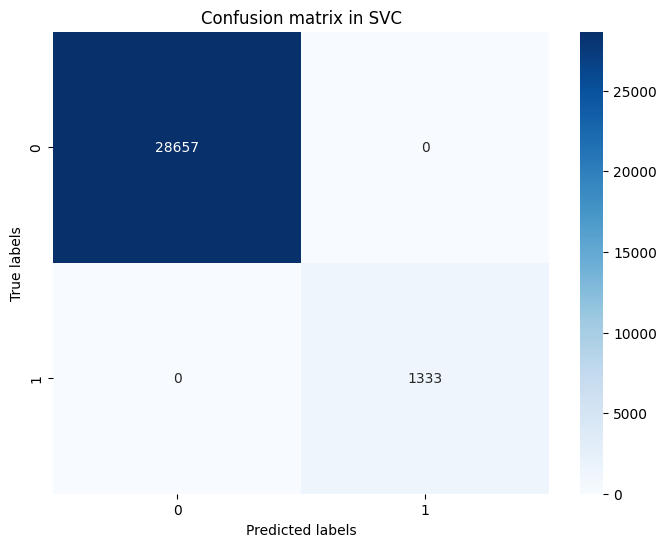

In [39]:
svc_conf = confusion_matrix(Y_validation, svc_pred)
plt.figure(figsize=(8,6))
sns.heatmap(svc_conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title(f"Confusion matrix in SVC")
plt.show()

In [40]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, Y_train)
mlp_pred = mlp_model.predict(X_validation)

mlp_acc = accuracy_score(Y_validation, mlp_pred)
mlp_recall = recall_score(Y_validation, mlp_pred)
mlp_perc = precision_score(Y_validation, mlp_pred)
mlp_fscore = f1_score(Y_validation, mlp_pred)

print("Precision:", mlp_perc)
print("Recall:", mlp_recall )
print("F1_Score:", mlp_fscore)

Precision: 1.0
Recall: 1.0
F1_Score: 1.0


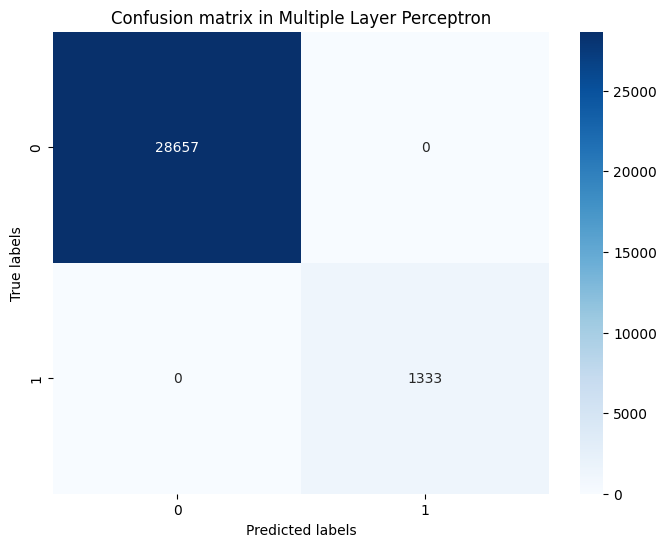

In [41]:
mlp_conf = confusion_matrix(Y_validation, mlp_pred)
plt.figure(figsize=(8,6))
sns.heatmap(mlp_conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title(f"Confusion matrix in Multiple Layer Perceptron")
plt.show()

In [42]:
gradient_model = GradientBoostingClassifier()
gradient_model.fit(X_train, Y_train)
gradient_pred = gradient_model.predict(X_validation)

gradient_acc = accuracy_score(Y_validation, gradient_pred)
gradient_perc = precision_score(Y_validation, gradient_pred)
gradient_recall = recall_score(Y_validation, gradient_pred)
gradient_fscore = f1_score(Y_validation, gradient_pred)

print("Precision:", gradient_perc)
print("Recall:", gradient_recall )
print("F1_Score:", gradient_fscore)

Precision: 0.9984996249062266
Recall: 0.9984996249062266
F1_Score: 0.9984996249062266


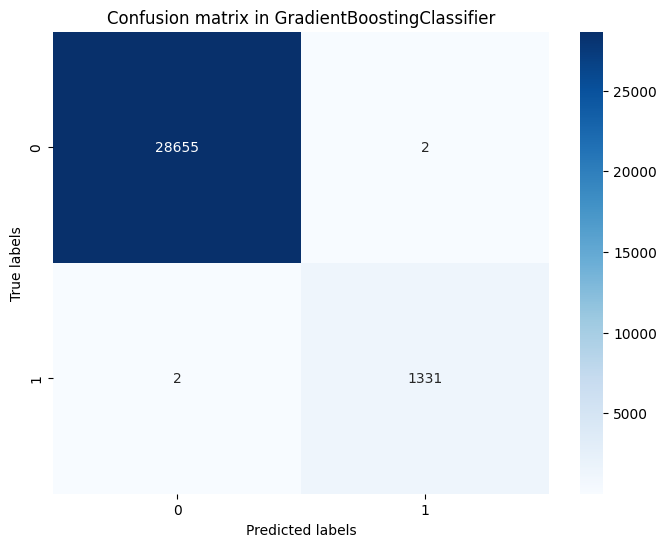

In [43]:
gradient_conf = confusion_matrix(Y_validation, gradient_pred)

plt.figure(figsize=(8,6))
sns.heatmap(gradient_conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title(f"Confusion matrix in GradientBoostingClassifier")
plt.show()

In [44]:
extra_model = ExtraTreesClassifier()
extra_model.fit(X_train, Y_train)
extra_pred = extra_model.predict(X_validation)

extra_acc = accuracy_score(Y_validation, extra_pred)
extra_perc = precision_score(Y_validation, extra_pred)
extra_recall = recall_score(Y_validation, extra_pred)
extra_fscore = f1_score(Y_validation, extra_pred)

print("Precision:", extra_perc)
print("Recall:", extra_recall )
print("F1_Score:", extra_fscore)

Precision: 0.9962349397590361
Recall: 0.9924981245311327
F1_Score: 0.9943630214205186


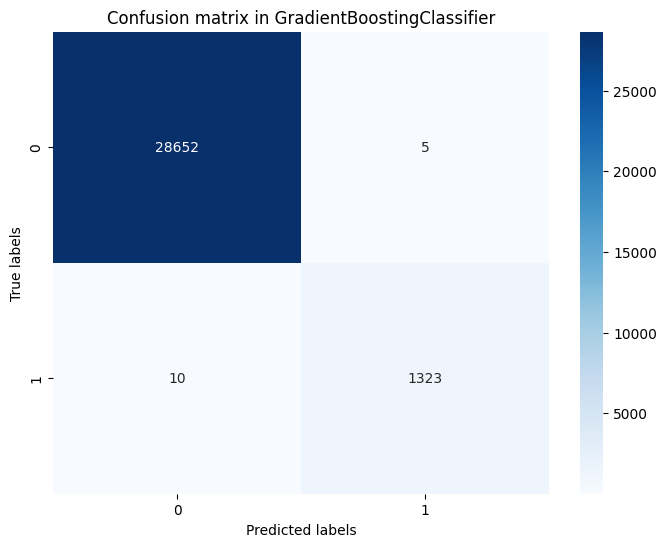

In [45]:
extra_conf = confusion_matrix(Y_validation, extra_pred)

plt.figure(figsize=(8,6))
sns.heatmap(extra_conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title(f"Confusion matrix in GradientBoostingClassifier")
plt.show()

In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_pred =rf_model.predict(X_validation)

rf_acc = accuracy_score(Y_validation, rf_pred)
rf_perc = precision_score(Y_validation, rf_pred)
rf_recall = recall_score(Y_validation, rf_pred)
rf_fscore = f1_score(Y_validation, rf_pred)

print("Precision:", rf_perc)
print("Recall:", rf_recall )
print("F1_Score:", rf_fscore)

Precision: 0.996206373292868
Recall: 0.9849962490622656
F1_Score: 0.990569596378725


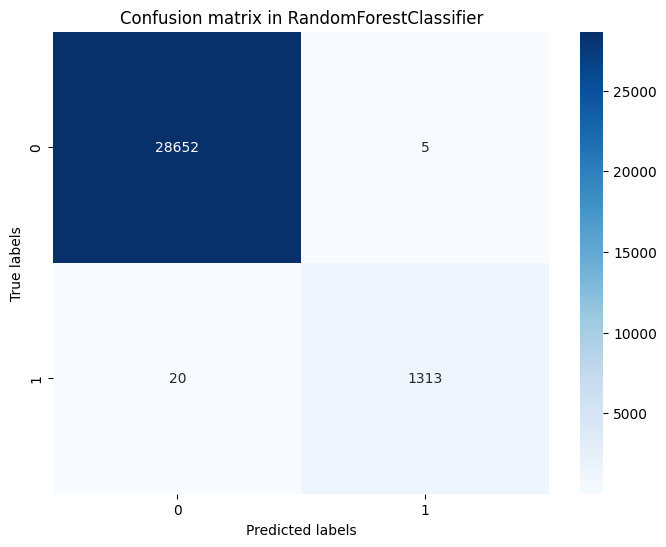

In [47]:
rf_conf = confusion_matrix(Y_validation, rf_pred)

plt.figure(figsize=(8,6))
sns.heatmap(rf_conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title(f"Confusion matrix in RandomForestClassifier")
plt.show()

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Comparing Models</h3>
</div>

In [48]:
top_models_df = pd.DataFrame({"Classifier" : ['SVC', 'MLPClassifier', 'GradientBoosting', 'ExtraTrees', "RandomForest"],
                  "Accuracy": [svc_acc, mlp_acc, gradient_acc, extra_acc, rf_acc], 
                  "Recall" : [svc_recall, mlp_recall, gradient_recall, extra_recall, rf_recall], 
                  "Precision" : [svc_perc, mlp_perc, gradient_perc, extra_perc, rf_perc], 
                  "F1" : [svc_fscore, mlp_fscore, gradient_fscore, extra_fscore, rf_fscore], }, )

top_models_df

,Classifier,Accuracy,Recall,Precision,F1
0,SVC,1.000000,1.000000,1.000000,1.000000
1,MLPClassifier,1.000000,1.000000,1.000000,1.000000
2,GradientBoosting,0.999867,0.998500,0.998500,0.998500
3,ExtraTrees,0.999500,0.992498,0.996235,0.994363
4,RandomForest,0.999166,0.984996,0.996206,0.990570


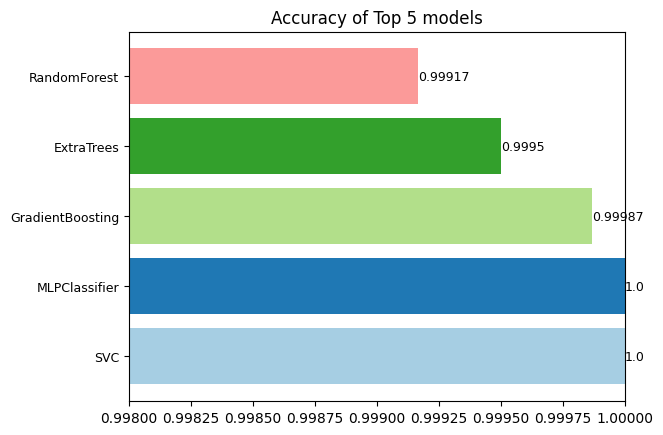

In [49]:
x = np.arange(5)
models = top_models_df["Classifier"].to_list()
values = top_models_df["Accuracy"].to_list()

colors = sns.color_palette("Paired", len(models))

bars = plt.barh(x, values, color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(values[i], 5), 
             va='center', ha='left', fontsize=9)

plt.yticks(x, models, fontsize=9)
plt.xlim(0.998, 1) 
plt.title('Accuracy of Top 5 models')

plt.show()

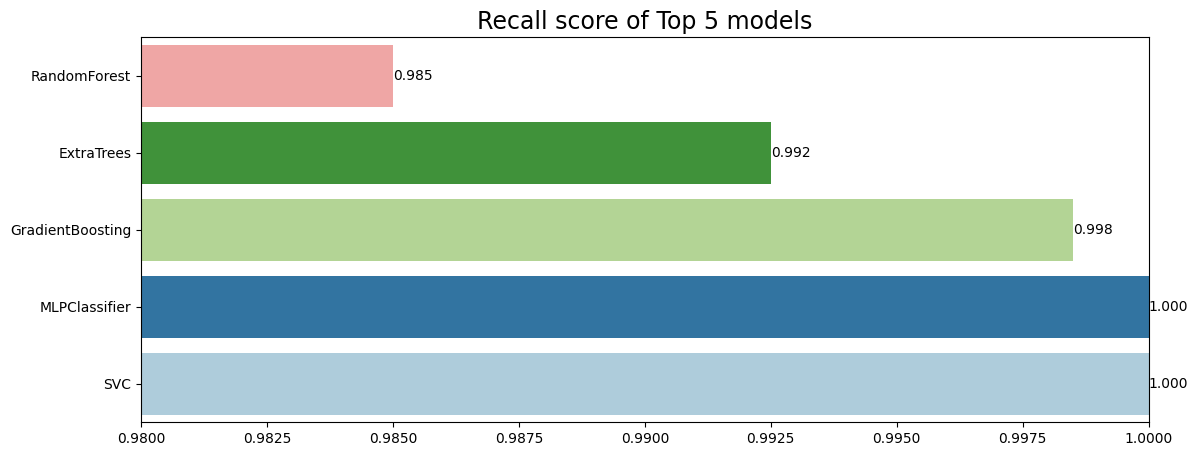

In [50]:
models = top_models_df["Classifier"].to_list()
recall_scores = top_models_df["Recall"].to_list()

plt.figure(figsize=(13, 5))
ax = sns.barplot(x=recall_scores, y=models, palette='Paired', hue=models)

for i, value in enumerate(recall_scores):
        ax.text(value, i, f'{value:.3f}', ha='left', va='center')

plt.xlim(0.98, 1)
plt.title('Recall score of Top 5 models', fontsize=17)
plt.gca().invert_yaxis()
plt.show()

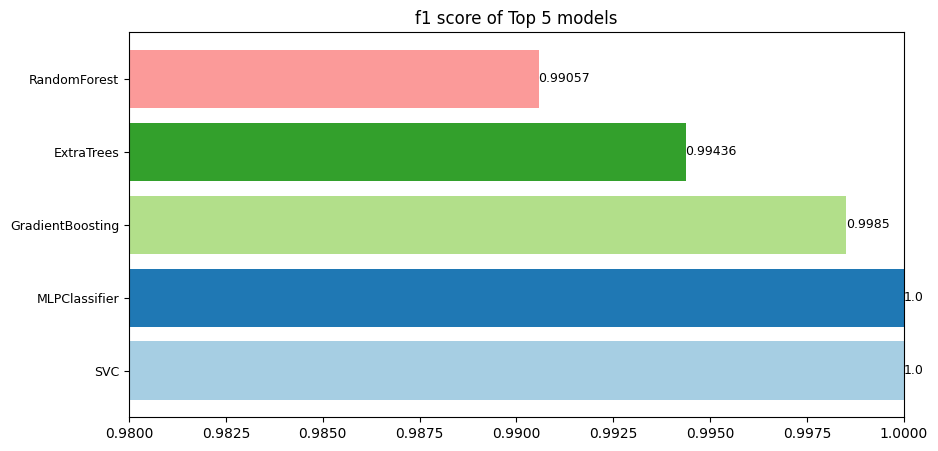

In [51]:
x = np.arange(5)
models = top_models_df["Classifier"]
values = top_models_df["F1"]

# Defining colors
colors = sns.color_palette("Paired", len(models))

plt.figure(figsize=(10, 5))

bars = plt.barh(x, values, color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(values[i], 5), 
             va='center', ha='left', fontsize=9)

plt.yticks(x, models, fontsize=9)
plt.xlim(0.98, 1) 
plt.title('f1 score of Top 5 models')
plt.show()

<div style="padding: 5px 0px; font-family: Cursive; font-size:16px; background-color:#f0f5ff;padding: 25px 10px">
Among the Top 5 models, MLP(MultiLayerPerceptron classifier) and SVC(Support Vector Classifier), which consistently ranked first and second in accuracy, recall and f1 score, were selected to be ensembled.</div>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Combining models</h3>
</div>

In [52]:
from sklearn.ensemble import VotingClassifier
voting_S_M = VotingClassifier(estimators=[("SVC", svc_model), ("MLP", mlp_model)])

voting_S_M.fit(X_train, Y_train)

VotingClassifier(estimators=[('SVC', SVC()), ('MLP', MLPClassifier())])

In [53]:
voting_train_pred = (svc_pred + mlp_pred) / 2

voting_acc = accuracy_score(Y_validation, voting_train_pred)
voting_recall = recall_score(Y_validation, voting_train_pred)
voting_prec = precision_score(Y_validation, voting_train_pred)
voting_fscore = f1_score(Y_validation, voting_train_pred)

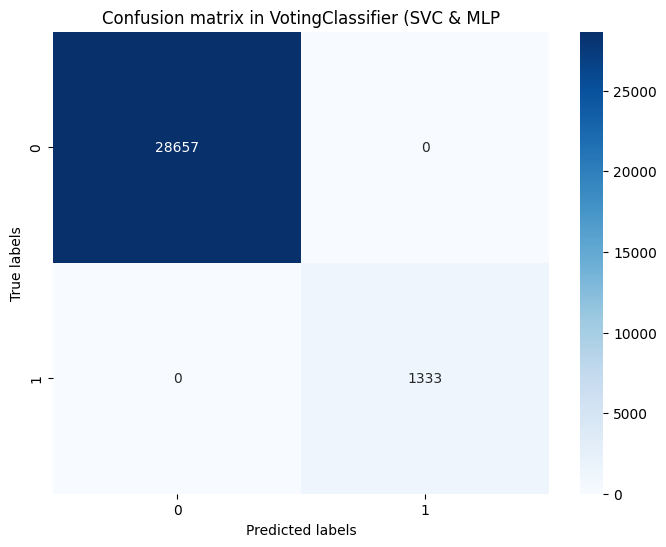

Precision: 1.0
Recall: 1.0
F1_Score: 1.0


In [54]:
voting_conf = confusion_matrix(Y_validation, voting_train_pred)

plt.figure(figsize=(8,6))
sns.heatmap(voting_conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title(f"Confusion matrix in VotingClassifier (SVC & MLP")
plt.show()

print("Precision:", voting_prec)
print("Recall:", voting_recall )
print("F1_Score:", voting_fscore)

In [55]:
# test set 
svc_test_pred = svc_model.predict(X_test)
mlp_test_pred = mlp_model.predict(X_test)

In [56]:
voting_test_pred = (svc_test_pred + mlp_test_pred) / 2

voting_test_acc = accuracy_score(Y_test, voting_test_pred)
voting_test_recall = recall_score(Y_test, voting_test_pred)
voting_test_perc = precision_score(Y_test, voting_test_pred)
voting_test_fscore = f1_score(Y_test, voting_test_pred)

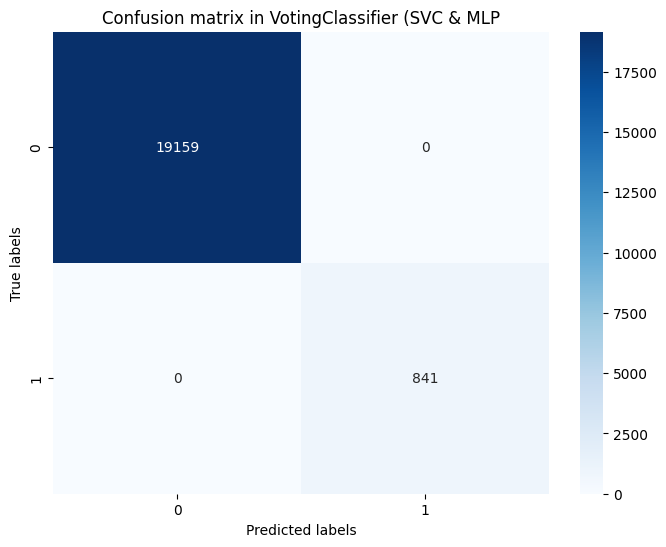

Precision: 1.0
Recall: 1.0
F1_Score: 1.0


In [57]:
voting_test_conf = confusion_matrix(Y_test, voting_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(voting_test_conf, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title(f"Confusion matrix in VotingClassifier (SVC & MLP")
plt.show()

print("Precision:", voting_test_perc)
print("Recall:", voting_test_recall )
print("F1_Score:", voting_test_fscore)

<div style="padding: 5px 0px; font-family: Cursive; font-size:16px; background-color:#f0f5ff;padding: 25px 10px">
As you can see, both scores of validation set and test set show 1.0 which is a higly irregular score. This might be caused by the balanced data set which can be found in the EDA part.</div>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
SHAPE</h3>
</div>

In [58]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Create a SHAP explainer specifically for XGBoost using TreeExplainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a subset of the test set
shap_values = explainer.shap_values(X_train[:3000])  # Using a subset of 100 rows for illustration

# Visualize individual predictions with force_plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

C:\Users\nitro 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


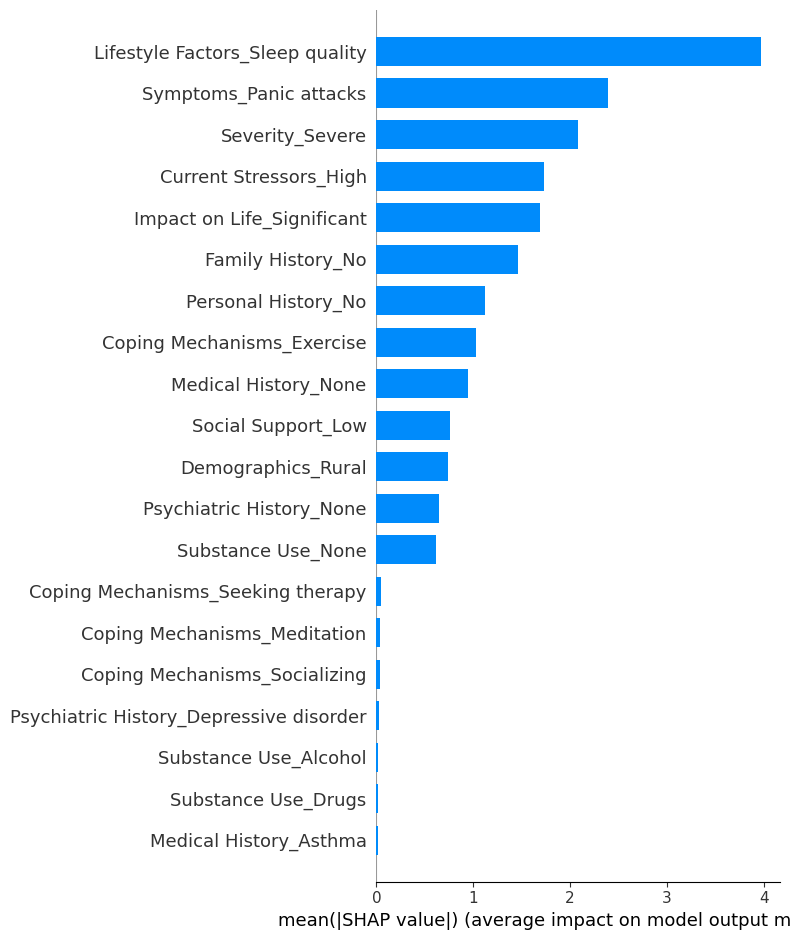

In [60]:
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Create a SHAP explainer specifically for XGBoost using TreeExplainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a subset of the test set
shap_values = explainer.shap_values(X_train[:3000])  # Using a subset of 100 rows for illustration

# Visualize individual predictions with force_plot
shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])
shap.summary_plot(shap_values, X_train, plot_type='bar')

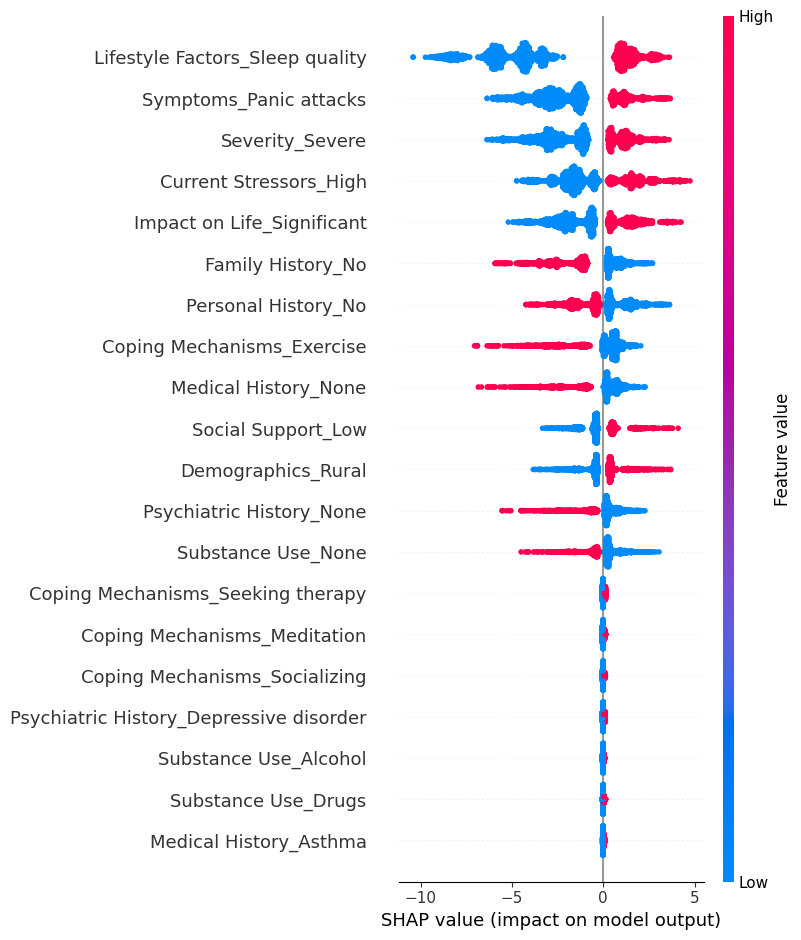

In [61]:
shap.initjs()
shap.summary_plot(shap_values, X_train[:3000])